# Import libraries

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Deep learning
from keras.models import Model
from keras.layers import (LSTM, Dense, Dropout, Input, GRU, BatchNormalization)
from keras.callbacks import  ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError


# Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualization
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')



# Data Cleaning

In [ ]:
path = '/Volumes/ORICO/classess/python for ml/class project/data/processed/processed_data.csv'
df = pd.read_csv(path)


In [9]:
df.shape

(7330717, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7330717 entries, 0 to 7330716
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 335.6 MB


In [11]:
df.describe()


,Timestamp,Open,High,Low,Close,Volume
count,7.330717e+06,7.330717e+06,7.330717e+06,7.330717e+06,7.330717e+06,7.330717e+06
mean,1.545337e+09,2.137200e+04,2.137967e+04,2.136412e+04,2.137201e+04,5.123372e+00
std,1.269778e+08,3.003552e+04,3.004372e+04,3.002720e+04,3.003552e+04,2.204903e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.435373e+09,4.437800e+02,4.439600e+02,4.435400e+02,4.437800e+02,1.975229e-02
50%,1.545334e+09,7.301200e+03,7.305340e+03,7.297540e+03,7.301220e+03,4.490000e-01
75%,1.655294e+09,3.100000e+04,3.101800e+04,3.097233e+04,3.100000e+04,2.895546e+00
max,1.765325e+09,1.262020e+05,1.262720e+05,1.261580e+05,1.262020e+05,5.853852e+03


In [12]:
df.isnull().sum()


Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [13]:
df.dropna(inplace=True)


In [14]:
df.duplicated().sum()


0

In [16]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [17]:
df.head()


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [18]:
# convert Timestamp from Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# set Timestamp as index
df.set_index('Timestamp', inplace=True)

In [19]:
df.sample(10)


,Open,High,Low,Close,Volume
Timestamp,,,,,
2017-12-15 20:40:00,17546.61,17559.13,17515.98,17559.12,4.443929
2015-05-07 16:01:00,230.60,230.94,230.60,230.72,1.890665
2015-03-30 02:06:00,241.13,241.13,241.13,241.13,1.825000
2025-08-07 11:42:00,116605.00,116605.00,116573.00,116596.00,0.286509
2014-06-23 11:15:00,589.42,592.01,587.13,591.87,24.425874
2013-11-24 13:47:00,778.00,779.80,764.41,764.41,1.960806
2021-06-09 19:39:00,36525.19,36617.55,36497.38,36538.11,11.382876
2019-04-01 23:49:00,4130.64,4130.64,4129.43,4129.97,8.238694
2015-09-16 16:03:00,226.59,226.70,226.59,226.70,2.700000


# Data Visualization

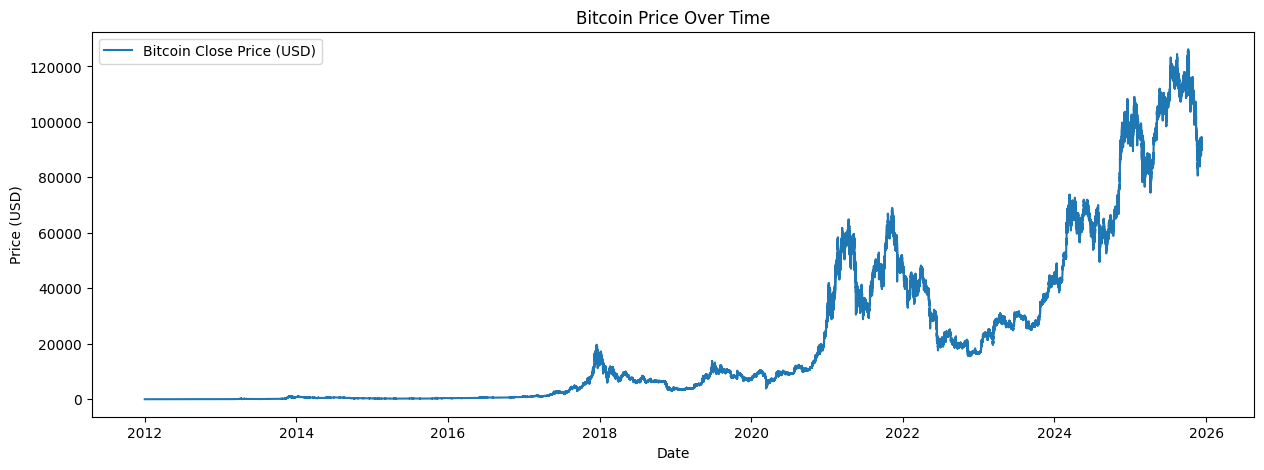

In [20]:
# Visualize the data
plt.figure(figsize=(15, 5))
plt.plot(df['Close'], label='Bitcoin Close Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


In [21]:
df.sample(10)

,Open,High,Low,Close,Volume
Timestamp,,,,,
2016-07-27 05:17:00,650.00,650.00,649.19,649.19,0.080528
2016-12-17 05:40:00,781.58,781.58,781.58,781.58,0.000000
2025-07-09 22:00:00,110919.00,110994.00,110919.00,110994.00,0.396120
2023-06-15 08:34:00,25001.00,25015.00,24994.00,25015.00,0.108410
2016-10-05 02:37:00,607.12,607.12,607.12,607.12,0.000000
2025-04-08 10:50:00,79040.00,79040.00,79011.00,79016.00,0.794209
2017-10-08 16:36:00,4461.00,4464.95,4460.00,4464.95,11.043938
2021-01-26 21:38:00,31744.22,31862.61,31740.67,31862.61,4.664979
2024-08-14 15:54:00,61400.00,61400.00,61360.00,61367.00,0.674881


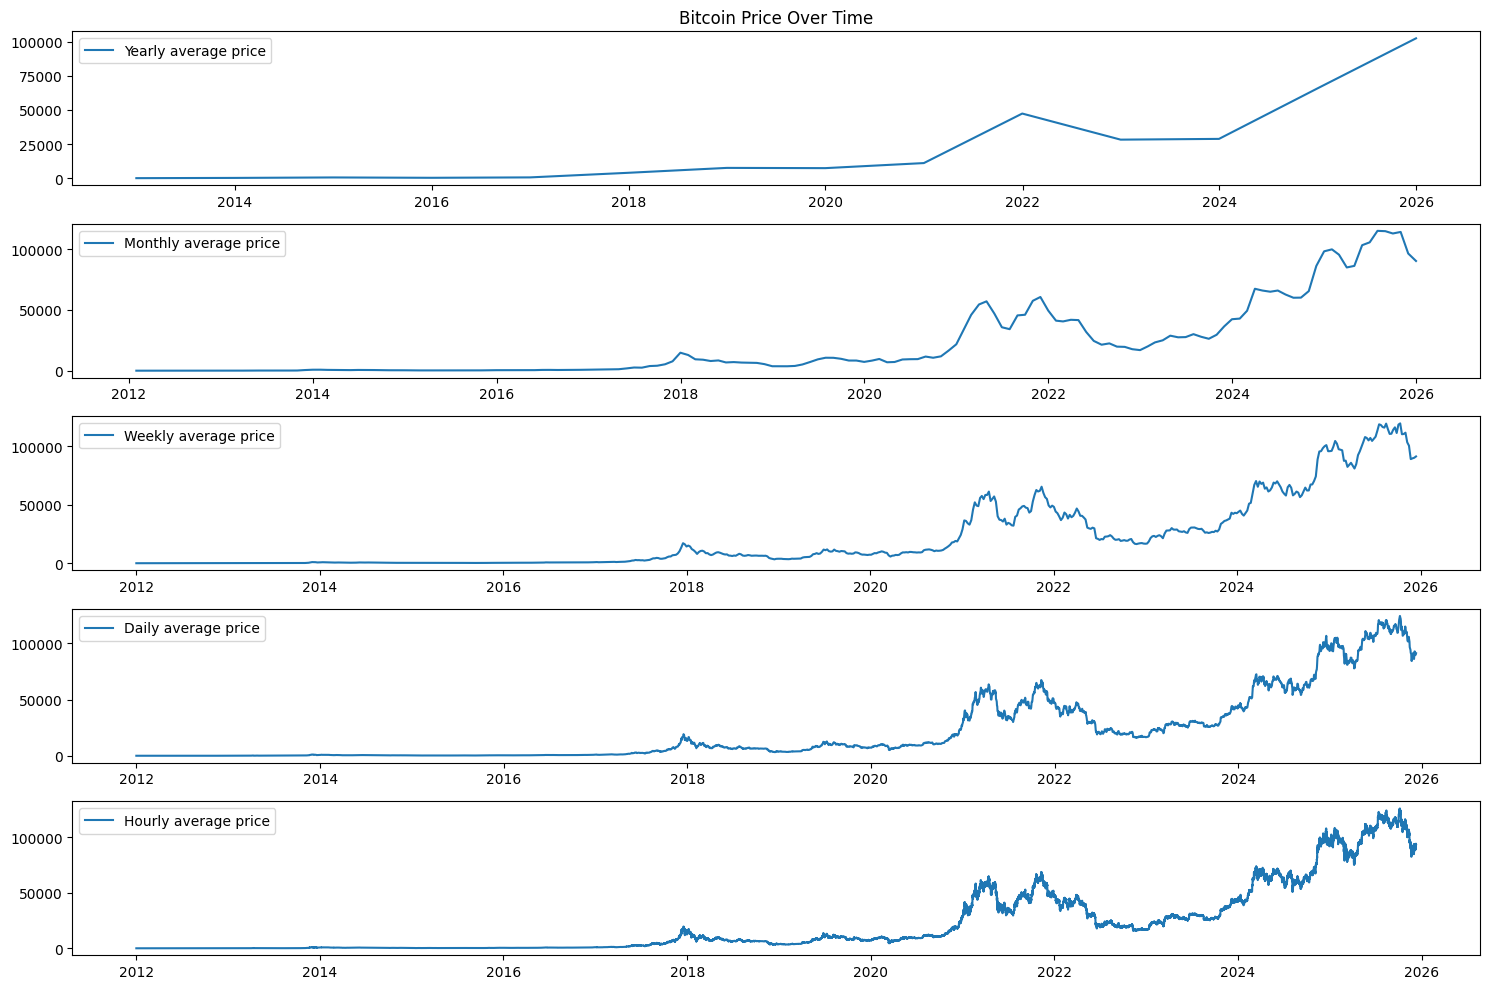

In [22]:
#print yearly, monthly, weekly, daily, hourly
# Resample and calculate mean prices at different time intervals
plt.figure(figsize=(15, 10), dpi=100)

plt.subplot(5, 1, 1)
plt.plot(df['Close'].resample('Y').mean(), label='Yearly average price')
plt.title('Bitcoin Price Over Time')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(df['Close'].resample('M').mean(), label='Monthly average price')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(df['Close'].resample('W').mean(), label='Weekly average price')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(df['Close'].resample('D').mean(), label='Daily average price')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(df['Close'].resample('H').mean(), label='Hourly average price')
plt.legend()

plt.tight_layout()




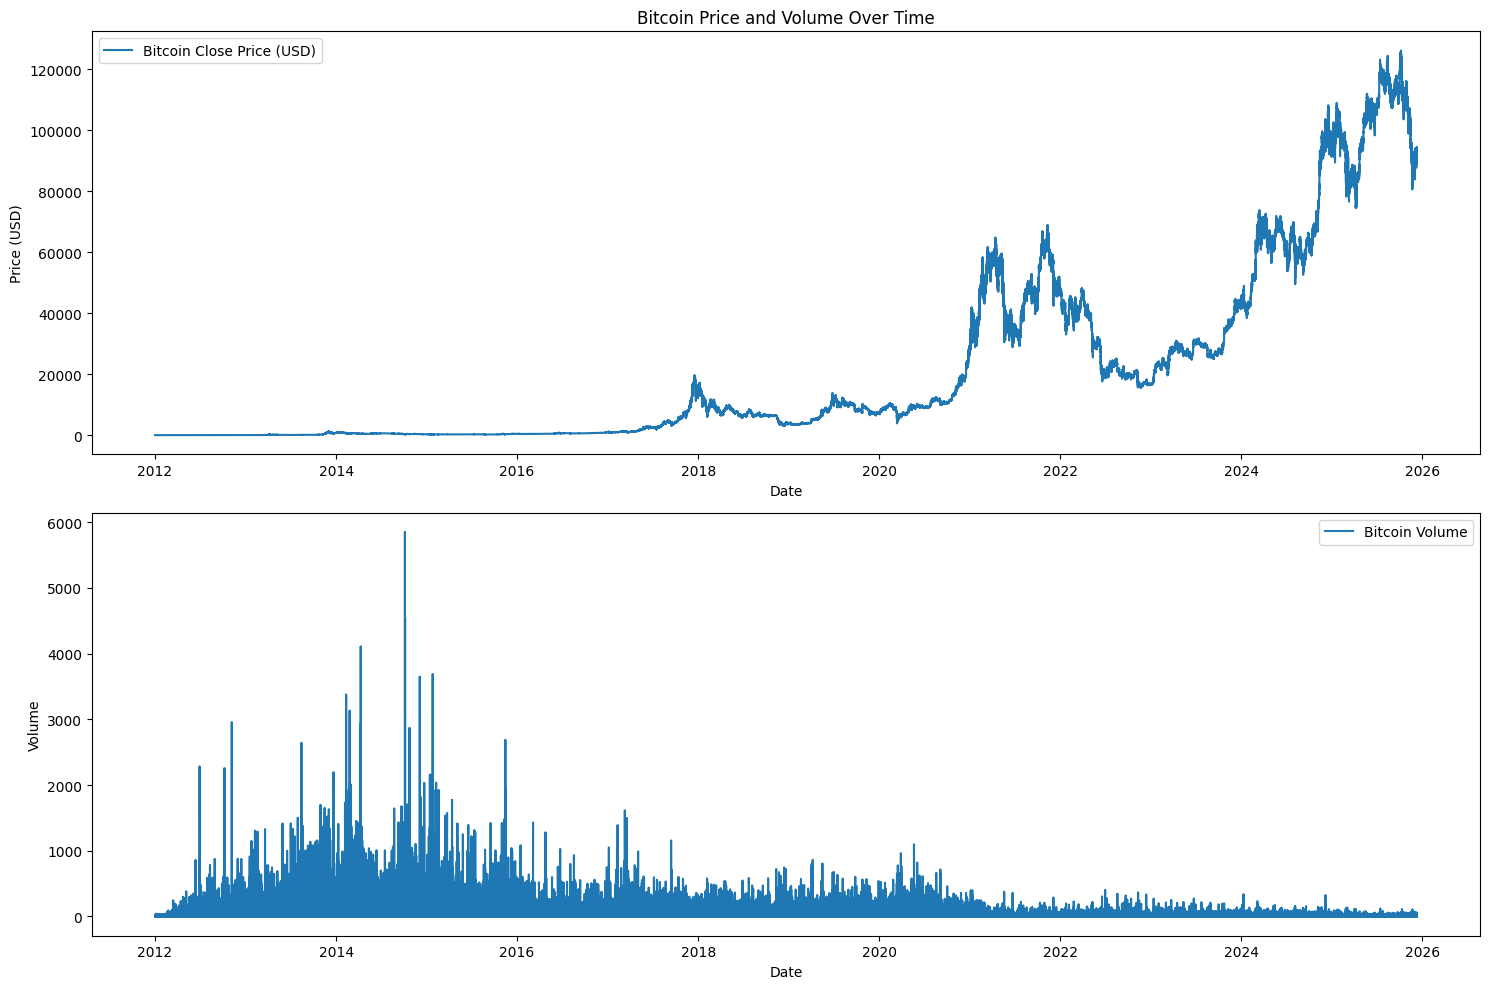

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(df['Close'], label='Bitcoin Close Price (USD)')
axs[0].set_title('Bitcoin Price and Volume Over Time')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price (USD)')
axs[0].legend()

axs[1].plot(df['Volume'], label='Bitcoin Volume')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].legend()

plt.tight_layout()

# Feature Engineering


In [24]:
# Resample to 1 day intervals using mean for price columns and sum for volume
df = df.resample('1D').agg({
    'Open': 'first',
    'High': 'max', 
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()
df

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000
2012-01-02,4.84,5.00,4.84,5.00,10.100000
2012-01-03,5.00,5.32,5.00,5.29,107.085281
2012-01-04,5.29,5.57,4.93,5.57,107.233260
2012-01-05,5.57,6.46,5.57,6.42,70.328742
...,...,...,...,...,...
2025-12-05,92109.00,92690.00,88156.00,89348.00,3068.813660
2025-12-06,89342.00,90286.00,88932.00,89249.00,1058.743730
2025-12-07,89256.00,91767.00,87744.00,90405.00,2387.945362


In [25]:
df.isnull().sum()


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [26]:
df.dropna(inplace=True)


# Data Preprocessing


- Using daily Bitcoin price data (OHLCV - Open, High, Low, Close, Volume)
- Currently focusing on Close price only for simplicity
- Using 50 days of historical prices to predict the next day's closing price
- Data is normalized using MinMaxScaler to improve model training

In [27]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [28]:
def create_sequences(data: pd.DataFrame, time_steps=60):
    X, y = [], []
    close_data = data['Close'].values
    for i in range(len(close_data) - time_steps):
        X.append(close_data[i:i+time_steps])
        y.append(close_data[i+time_steps])
    return np.array(X), np.array(y)

In [29]:
time_steps = 50  # Use past 50 days' prices to predict the next price
X, y = create_sequences(df, time_steps)

# Split into training and testing sets (80% train, 20% test)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [30]:
# Print shapes of training and test sets
print(
    f"X Training set shape: {X_train.shape}",
    f"X Test set shape: {X_test.shape}",
    f"y Training set shape: {y_train.shape}", 
    f"y Test set shape: {y_test.shape}",
    sep="\n"
)


X Training set shape: (4033, 50)
X Test set shape: (1009, 50)
y Training set shape: (4033,)
y Test set shape: (1009,)


In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)



In [32]:
X_train.shape

(4033, 50)

# Model Training


Trying with only 1 feature - Close

We're implementing a stacked LSTM model with the following architecture:
1. Input layer: Shape (50 timesteps, 1 feature)
2. First LSTM layer: 128 units with batch normalization and dropout (0.2)
3. Second LSTM layer: 128 units with batch normalization and dropout (0.2)
4. Dense layer: 64 units with ReLU activation
5. Output layer: 1 unit (predicting next day's price)

Training Configuration:
- 80% training data, 20% test data
- Batch size: 64
- Epochs: 100
- Learning rate: 0.001 with ReduceLROnPlateau
- Early stopping and model checkpointing implemented

In [33]:
# Define input layer
inputs = Input(shape=(time_steps, 1))

# First LSTM layer
x = LSTM(units=128, return_sequences=True)(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Second LSTM layer
x = LSTM(units=128, return_sequences=False)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Dense layers
x = Dense(64, activation='relu')(x)
x = Dense(1)(x)

# Define model
model_lstm_l2_v1 = Model(inputs=inputs, outputs=x)
model_lstm_l2_v1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError(),])

# Print model summary
model_lstm_l2_v1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 50, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 207,489 (810.50 KB)

 Trainable params: 206,977 (808.50 KB)

 Non-trainable params: 512 (2.00 KB)

## Training Model - LSTM with 2 layers

In [ ]:
# Train the model
history = model_lstm_l2_v1.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=1e-6,
            verbose=0
        ),
        ModelCheckpoint(
            '/Volumes/ORICO/classess/python for ml/class project/notebooks/saved_model/working/lstm_l2_v1.keras',
            monitor='val_loss',
            save_best_only=True,
            verbose=0
        ),
    ],
    verbose=0
)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


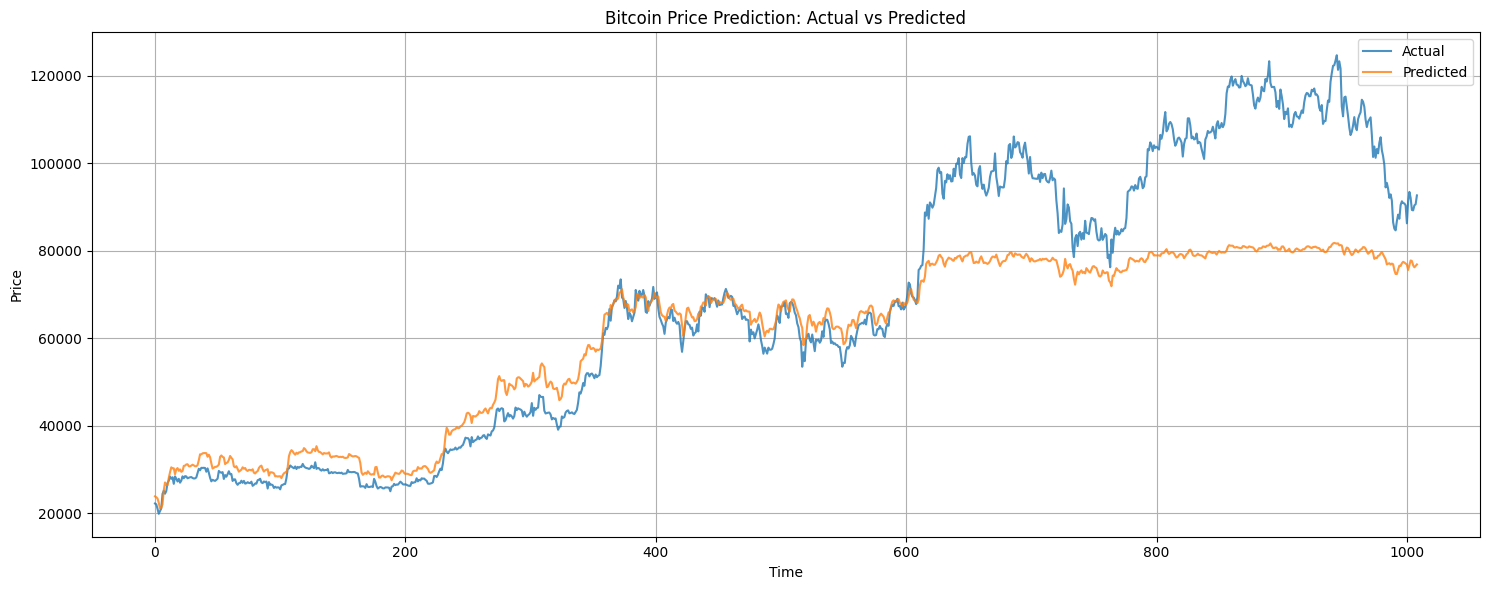

In [35]:
# Make predictions
y_pred = model_lstm_l2_v1.predict(X_test)

# Create figure
plt.figure(figsize=(15, 6))

# Plot actual vs predicted values
plt.plot(y_test, label='Actual', alpha=0.8)
plt.plot(y_pred, label='Predicted', alpha=0.8)

plt.title('Bitcoin Price Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Increasing the dropout rate to reduce overfit

In [36]:
# Define input layer
inputs = Input(shape=(time_steps, 1))

# First LSTM layer
x = LSTM(units=128, return_sequences=True)(inputs)
x = BatchNormalization()(x)
x = Dropout(0.7)(x)

# Second LSTM layer
x = LSTM(units=128, return_sequences=False)(x)
x = BatchNormalization()(x)
x = Dropout(0.7)(x)

# Dense layers
x = Dense(64, activation='relu')(x)
x = Dense(1)(x)

# Define model
model_lstm_l2_v2 = Model(inputs=inputs, outputs=x)
model_lstm_l2_v2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError(),])

# Print model summary
model_lstm_l2_v2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 50, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 207,489 (810.50 KB)

 Trainable params: 206,977 (808.50 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# Train the model
history = model_lstm_l2_v2.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=1e-6,
            verbose=1
        ),
        ModelCheckpoint(
            '/Volumes/ORICO/classess/python for ml/class project/notebooks/saved_model/model_lstm_l2_v2.keras',
            monitor='val_loss',
            save_best_only=True,
            verbose=0
        ),
    ],
    verbose=0
)



Epoch 36: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 41: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 46: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 51: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 56: ReduceLROnPlateau reducing learning rate to 1e-06.


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


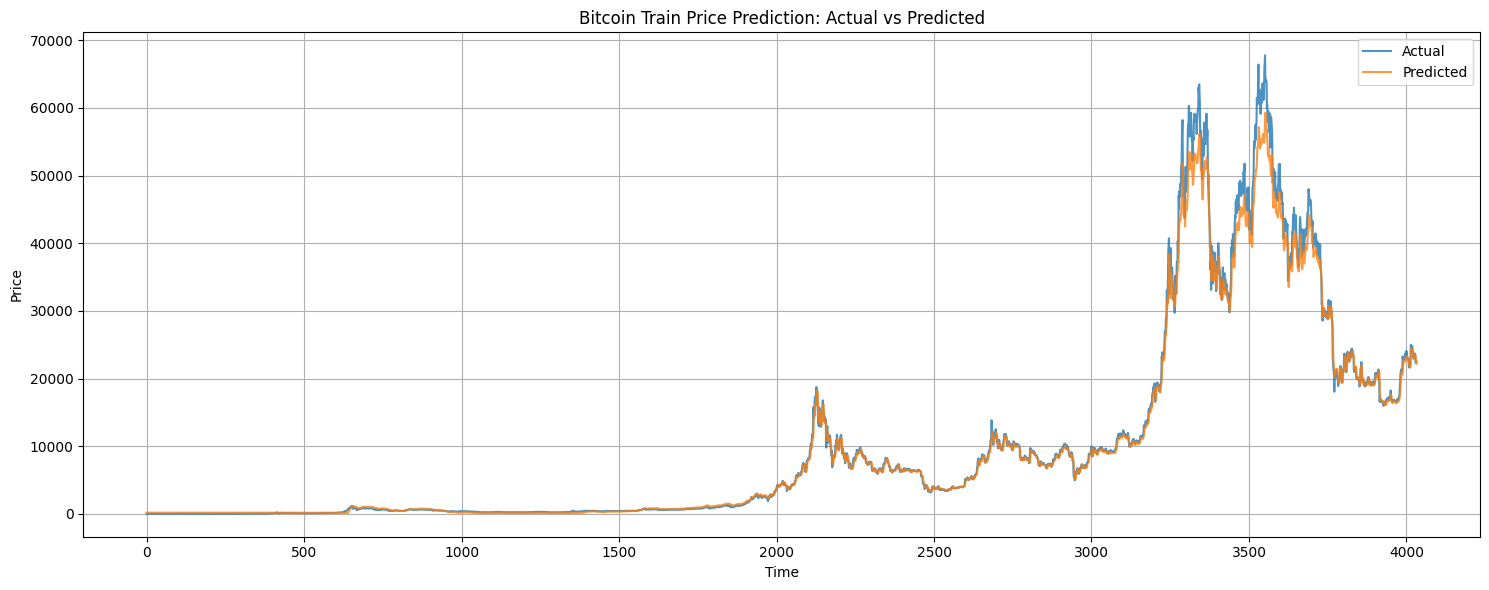

In [38]:
# Make predictions
y_pred = model_lstm_l2_v2.predict(X_train)

# Create figure
plt.figure(figsize=(15, 6))

# Plot actual vs predicted values
plt.plot(y_train, label='Actual', alpha=0.8)
plt.plot(y_pred, label='Predicted', alpha=0.8)

plt.title('Bitcoin Train Price Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


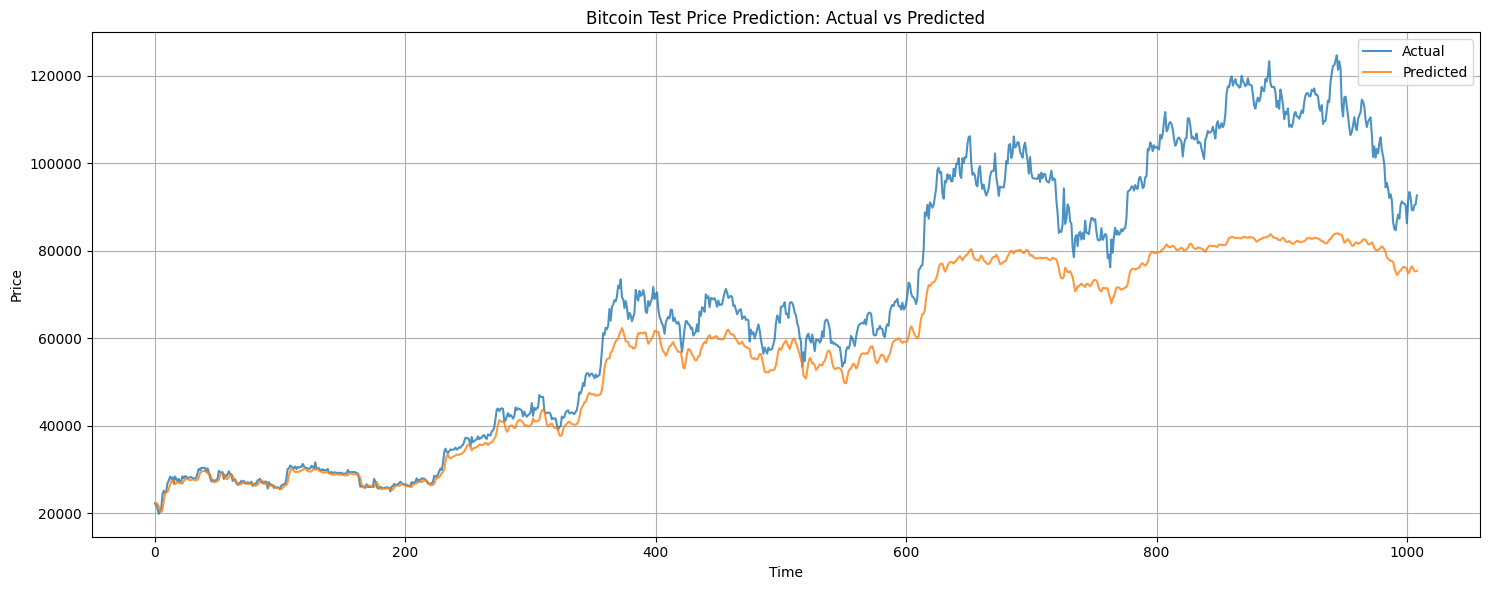

In [39]:
# Make predictions
y_pred = model_lstm_l2_v2.predict(X_test)

# Create figure
plt.figure(figsize=(15, 6))

# Plot actual vs predicted values
plt.plot(y_test, label='Actual', alpha=0.8)
plt.plot(y_pred, label='Predicted', alpha=0.8)

plt.title('Bitcoin Test Price Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [40]:
# Make predictions
y_pred = model_lstm_l2_v2.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error: ", mape, "%")

# Calculate R-Squared
r2 = r2_score(y_test, y_pred)
print("R-Squared: ", r2)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Root Mean Squared Error:  15654.859381592389
Mean Absolute Error:  11286.776073928395
Mean Absolute Percentage Error:  55.900014845197866 %
R-Squared:  0.744586520421922



Iteration 1
Dropout: 0.7, Units: 64, Batch Size: 128
RMSE: 31330.88760216676


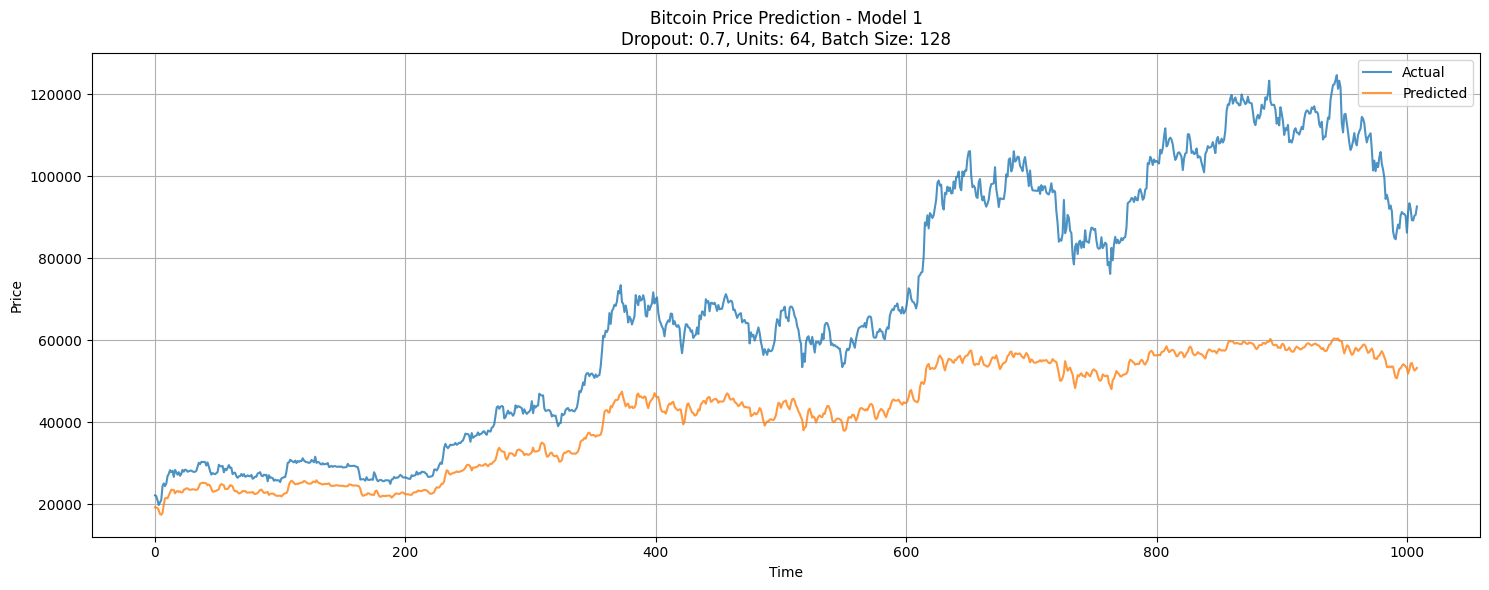


Iteration 2
Dropout: 0.8, Units: 200, Batch Size: 32
RMSE: 17822.022771813114


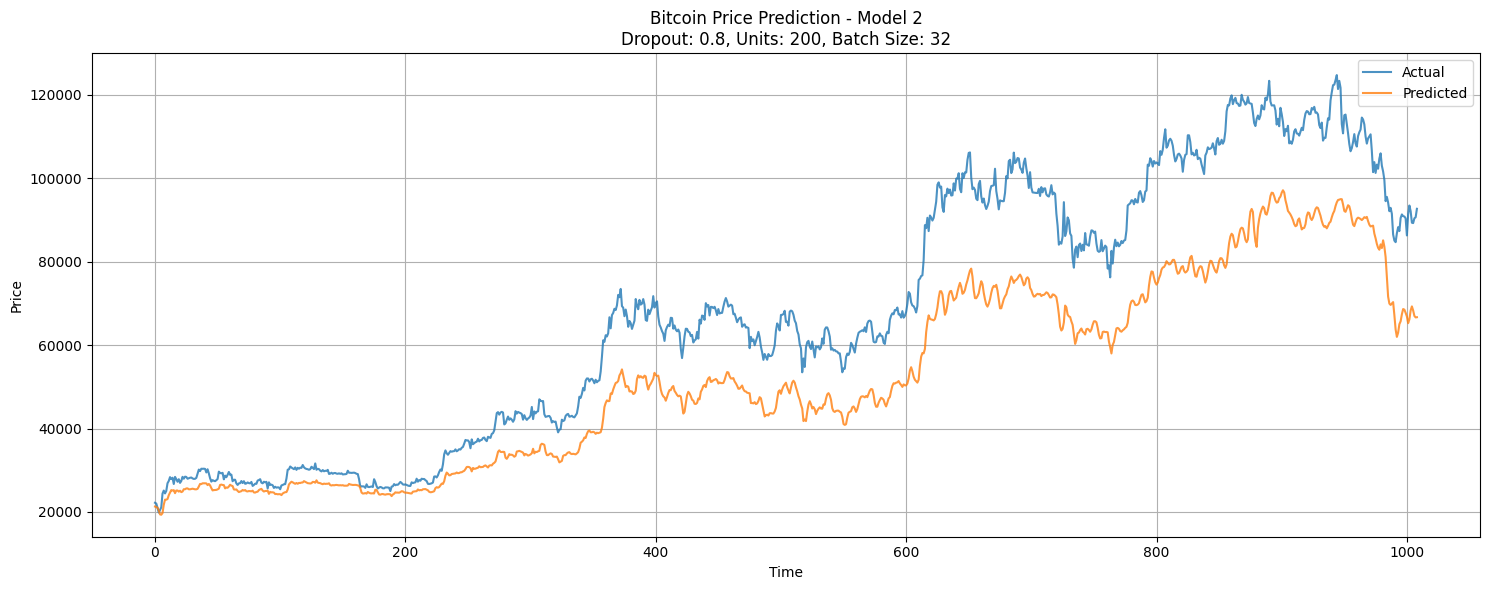


Iteration 3
Dropout: 0.7, Units: 200, Batch Size: 128
RMSE: 22835.971454020375


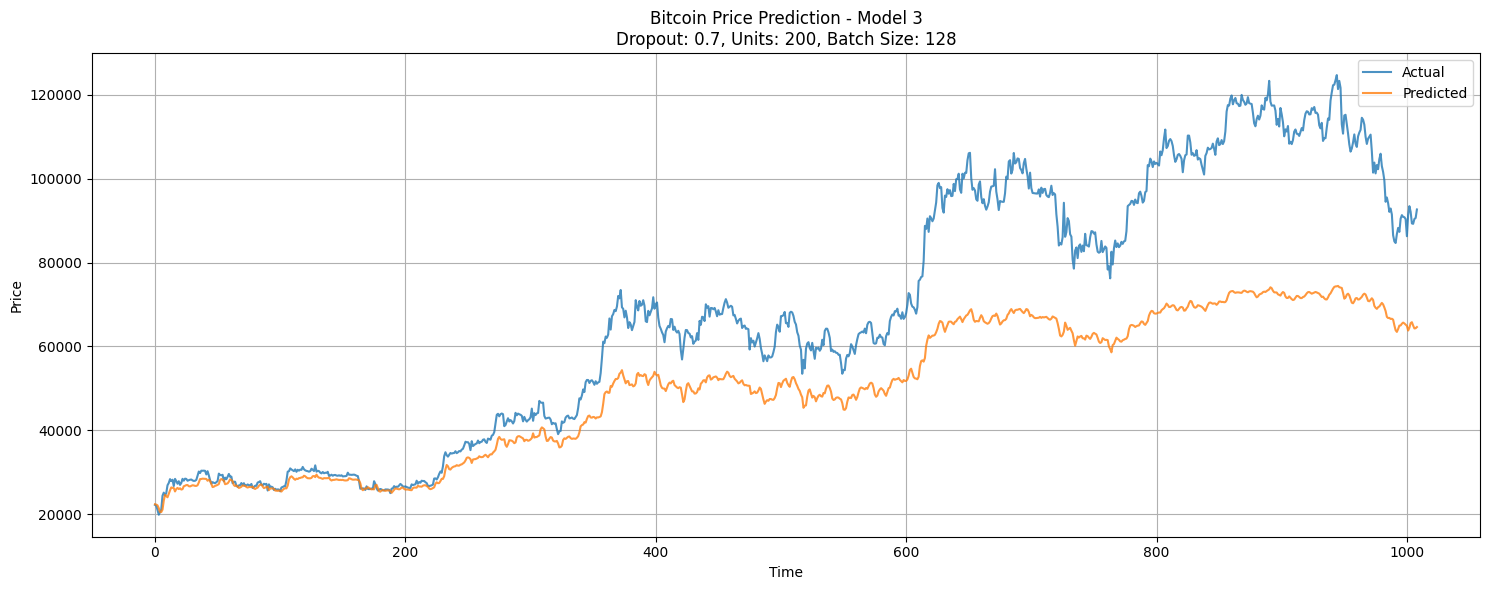


Iteration 4
Dropout: 0.7, Units: 128, Batch Size: 128
RMSE: 21906.970715758453


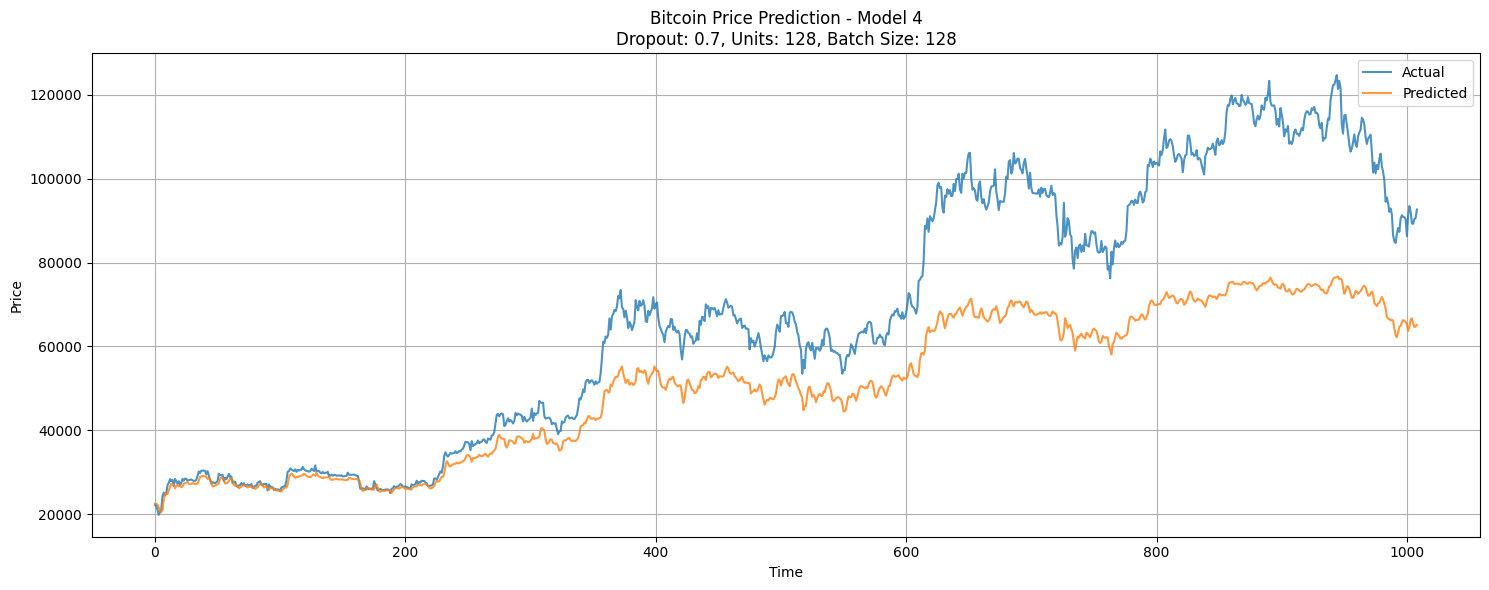


Iteration 5
Dropout: 0.7, Units: 64, Batch Size: 32
RMSE: 21195.868605791005


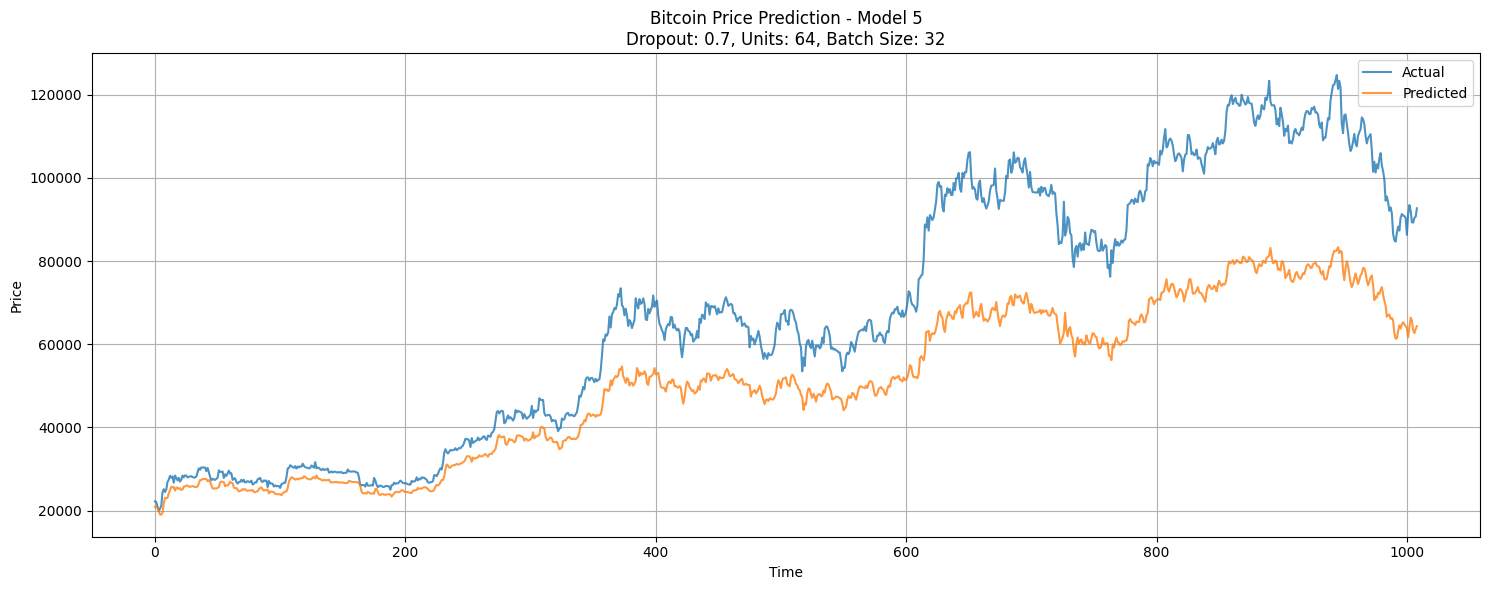


Iteration 6
Dropout: 0.5, Units: 200, Batch Size: 64
RMSE: 23253.741233937697


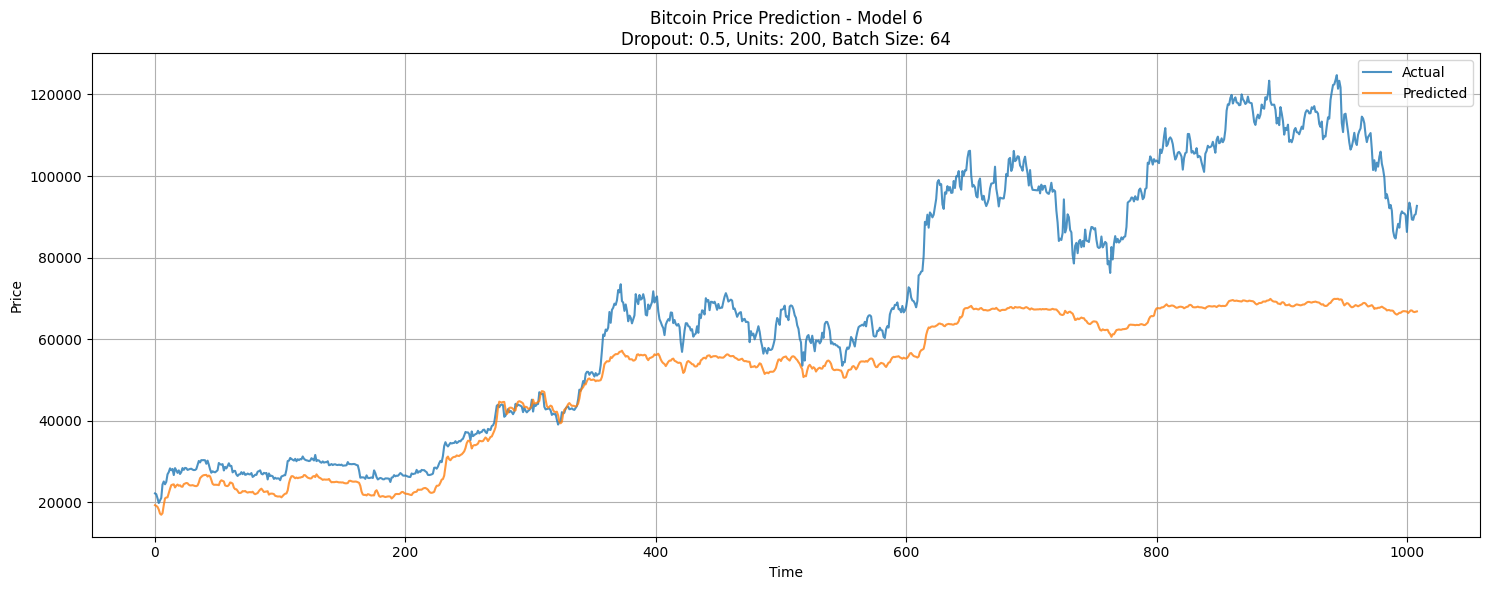


Iteration 7
Dropout: 0.8, Units: 128, Batch Size: 128
RMSE: 30143.30195068015


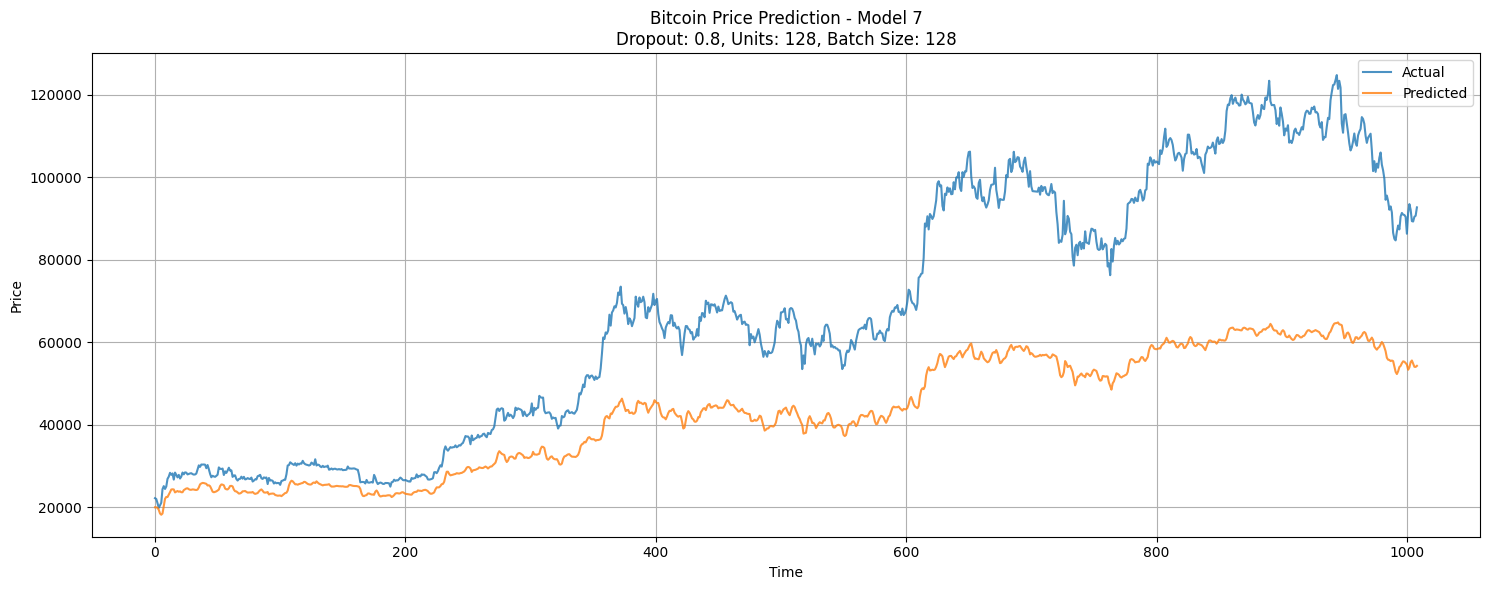


Iteration 8
Dropout: 0.8, Units: 128, Batch Size: 128
RMSE: 27610.76529017399


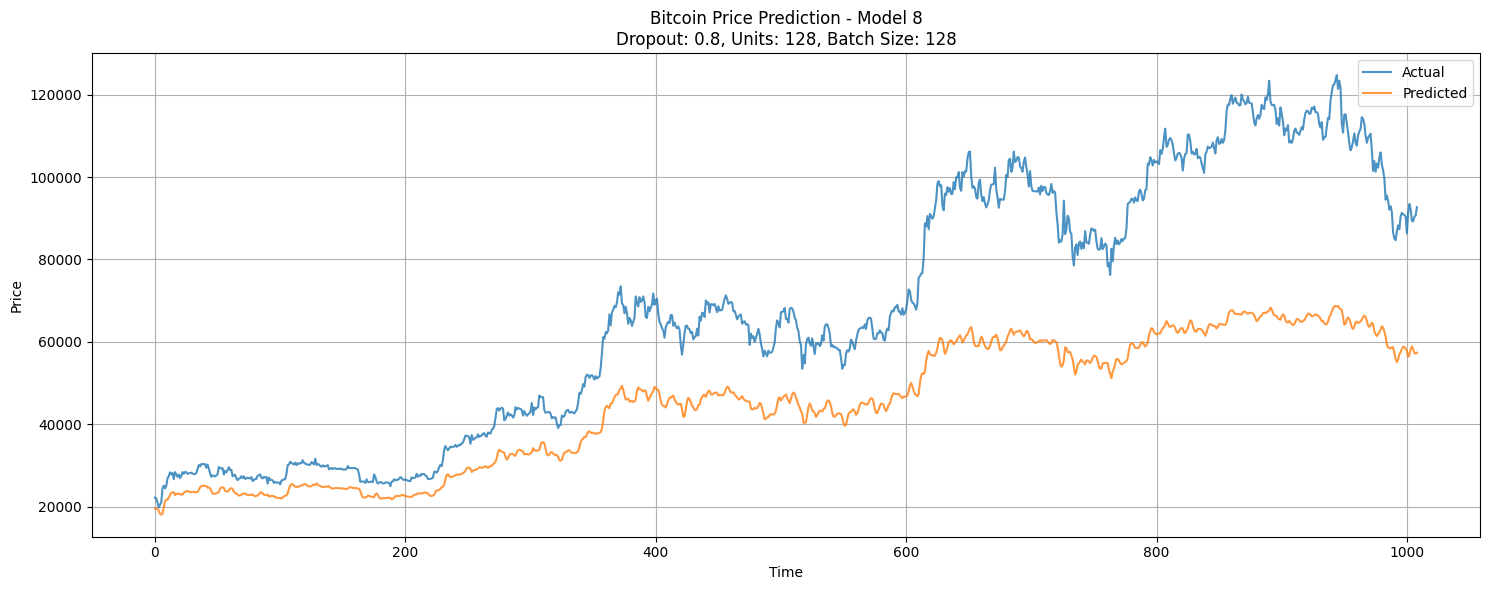


Iteration 9
Dropout: 0.7, Units: 64, Batch Size: 64
RMSE: 20815.302506629112


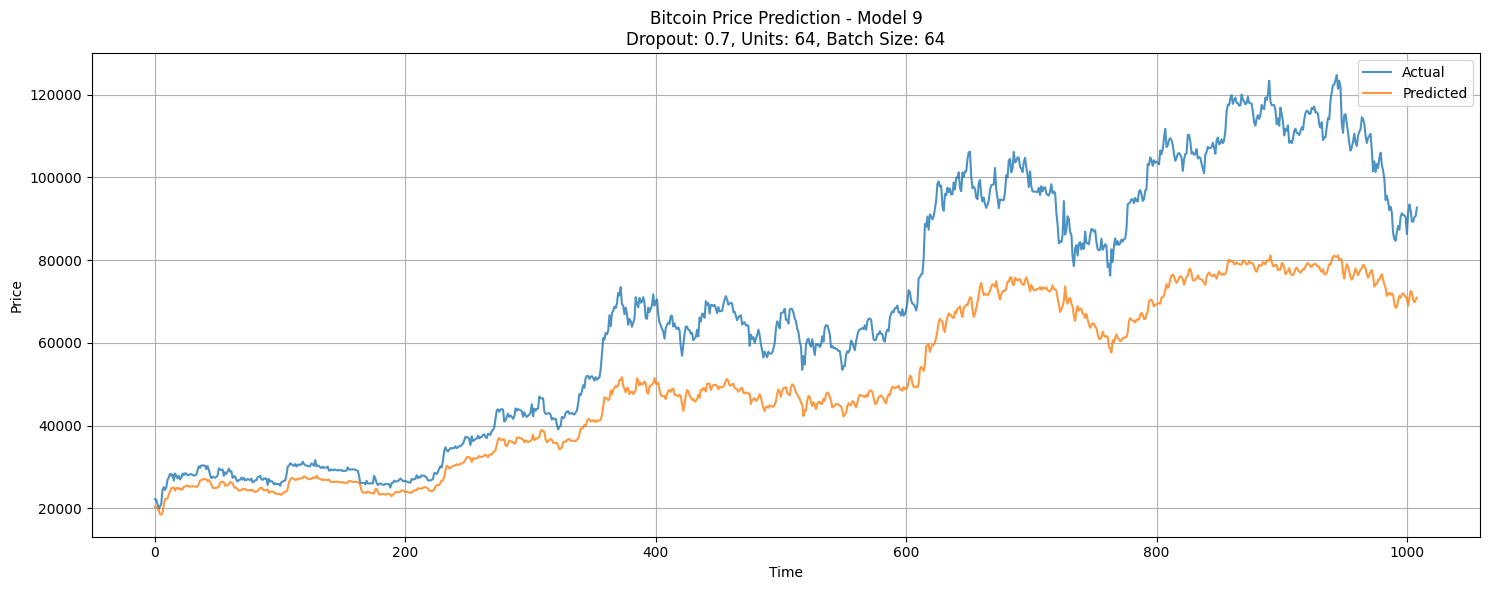


Iteration 10
Dropout: 0.5, Units: 200, Batch Size: 128
RMSE: 20223.473541839296


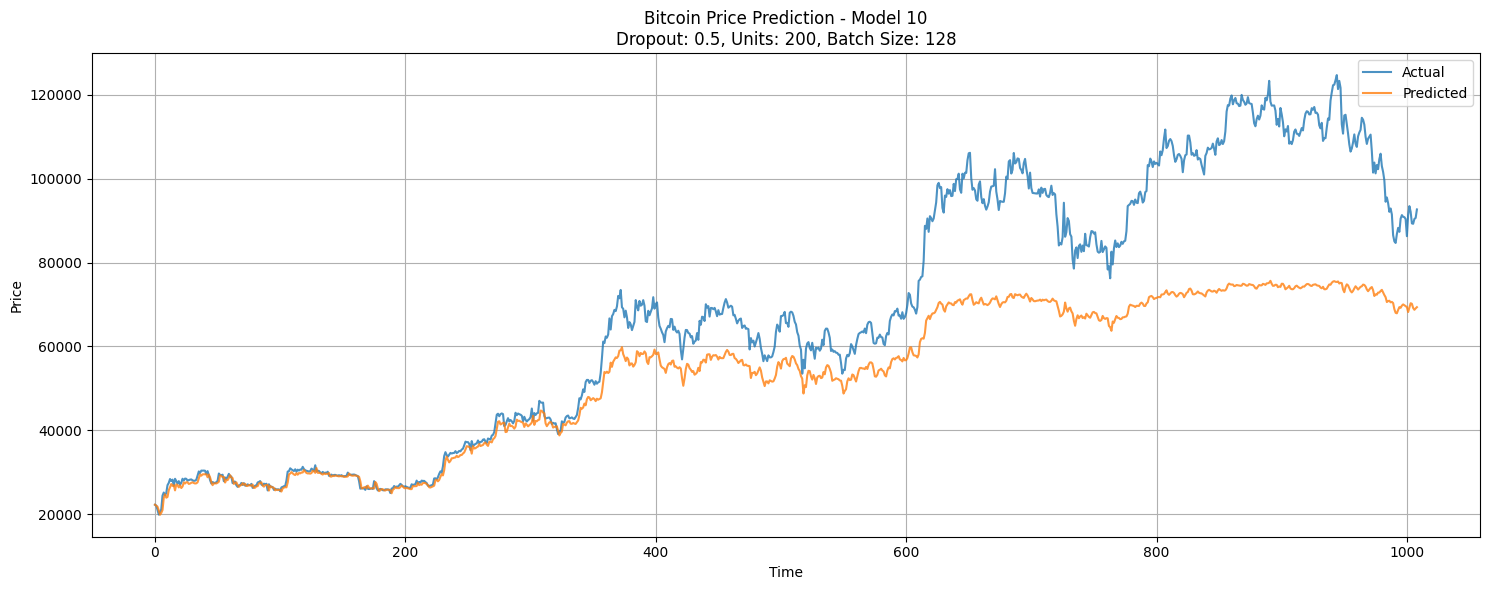


Best Parameters:
Dropout Rate: 0.8
LSTM Units: 200
Batch Size: 32
Validation Loss: 4122272.0
RMSE: 17822.022771813114


In [41]:
# Define hyperparameter search space
dropout_rates = [0.5, 0.7, 0.8]
lstm_units = [64, 128, 200] 
batch_sizes = [32, 64, 128]

# Store results
random_search_results = []

# Number of random combinations to try
n_iterations = 10

for i in range(n_iterations):
    # Randomly sample hyperparameters and cast to native types
    dropout = float(np.random.choice(dropout_rates))
    units = int(np.random.choice(lstm_units))
    batch = int(np.random.choice(batch_sizes))
    
    print(f"\nIteration {i+1}")
    print(f"Dropout: {dropout}, Units: {units}, Batch Size: {batch}")
    
    # Define model with sampled parameters
    inputs = Input(shape=(time_steps, 1))
    
    x = LSTM(units=units, return_sequences=True)(inputs)
    x = BatchNormalization()(x)
    x = Dropout(dropout)(x)
    
    x = LSTM(units=units, return_sequences=False)(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout)(x)
    
    x = Dense(64, activation='relu')(x)
    x = Dense(1)(x)
    
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='mean_squared_error',
                  metrics=[RootMeanSquaredError()])
    
    # Train model
    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=batch,
                        validation_split=0.2,
                        verbose=0)
    
    # Make predictions
    y_pred = model.predict(X_test, verbose=0)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse}")
    
    # Plot actual vs predicted
    plt.figure(figsize=(15, 6))
    plt.plot(y_test, label='Actual', alpha=0.8)
    plt.plot(y_pred, label='Predicted', alpha=0.8)
    plt.title(f'Bitcoin Price Prediction - Model {i+1}\nDropout: {dropout}, Units: {units}, Batch Size: {batch}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Evaluate model
    val_loss = min(history.history['val_loss'])
    
    # Store results
    random_search_results.append({
        'dropout': dropout,
        'units': units,
        'batch_size': batch,
        'val_loss': val_loss,
        'rmse': rmse
    })
    
# Find best parameters
best_trial = min(random_search_results, key=lambda x: x['val_loss'])
print("\nBest Parameters:")
print(f"Dropout Rate: {best_trial['dropout']}")
print(f"LSTM Units: {best_trial['units']}")
print(f"Batch Size: {best_trial['batch_size']}")
print(f"Validation Loss: {best_trial['val_loss']}")
print(f"RMSE: {best_trial['rmse']}")

 We achieved good results with just 2 LSTM layers. Generally, models tend to overfit when predicting stock prices since price movements rarely follow historical patterns. Given this challenge, our model demonstrated good generalization ability.

Training the model with best param we got using RandomSearchCV

RMSE: 10151.590874187219


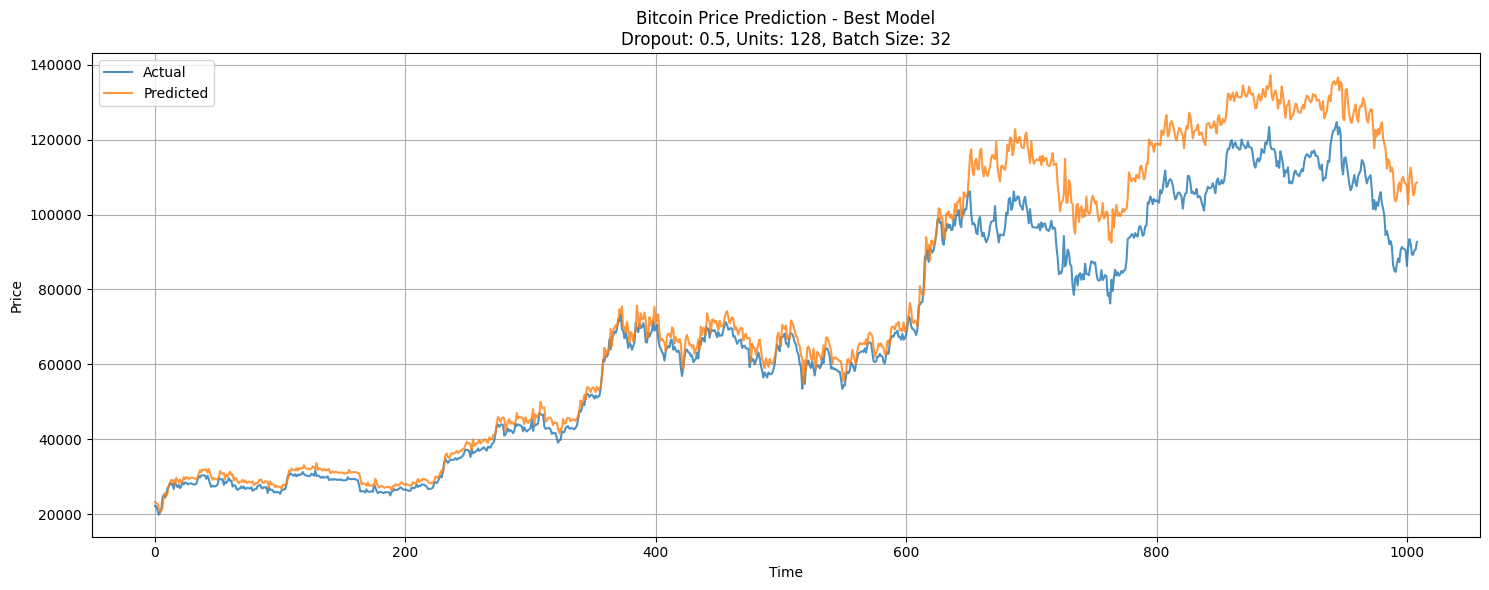

In [42]:
# Define model with best parameters
inputs = Input(shape=(time_steps, 1))

x = LSTM(units=64, return_sequences=True)(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = LSTM(units=64, return_sequences=False)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Dense(1)(x)

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.001), 
             loss='mean_squared_error',
             metrics=[RootMeanSquaredError()])

# Train model
history = model.fit(X_train, y_train,
                   epochs=100,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=0)

# Make predictions
y_pred = model.predict(X_test, verbose=0)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual', alpha=0.8)
plt.plot(y_pred, label='Predicted', alpha=0.8)
plt.title('Bitcoin Price Prediction - Best Model\nDropout: 0.5, Units: 128, Batch Size: 32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Trying with GRU, using best params we got by RandomSearchCV

In [43]:
# Define input layer
inputs = Input(shape=(time_steps, 1))

# First GRU layer
x = GRU(units=64, return_sequences=True)(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Second GRU layer
x = GRU(units=64, return_sequences=False)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Dense layers
x = Dense(64, activation='relu')(x)
x = Dense(1)(x)

# Define model
model_gru_2_layers = Model(inputs=inputs, outputs=x)
model_gru_2_layers.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError(),])

# Print model summary
model_gru_2_layers.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 50, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 50, 64)              │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 50, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,561 (166.25 KB)

 Trainable params: 42,305 (165.25 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
# Train the model
history = model_gru_2_layers.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=1e-6,
            verbose=0
        ),
        ModelCheckpoint(
            '/Volumes/ORICO/classess/python for ml/class project/notebooks/saved_model/gru_l2_v1.keras',
            monitor='val_loss',
            save_best_only=True,
            verbose=0
        ),
    ],
    verbose=0
)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


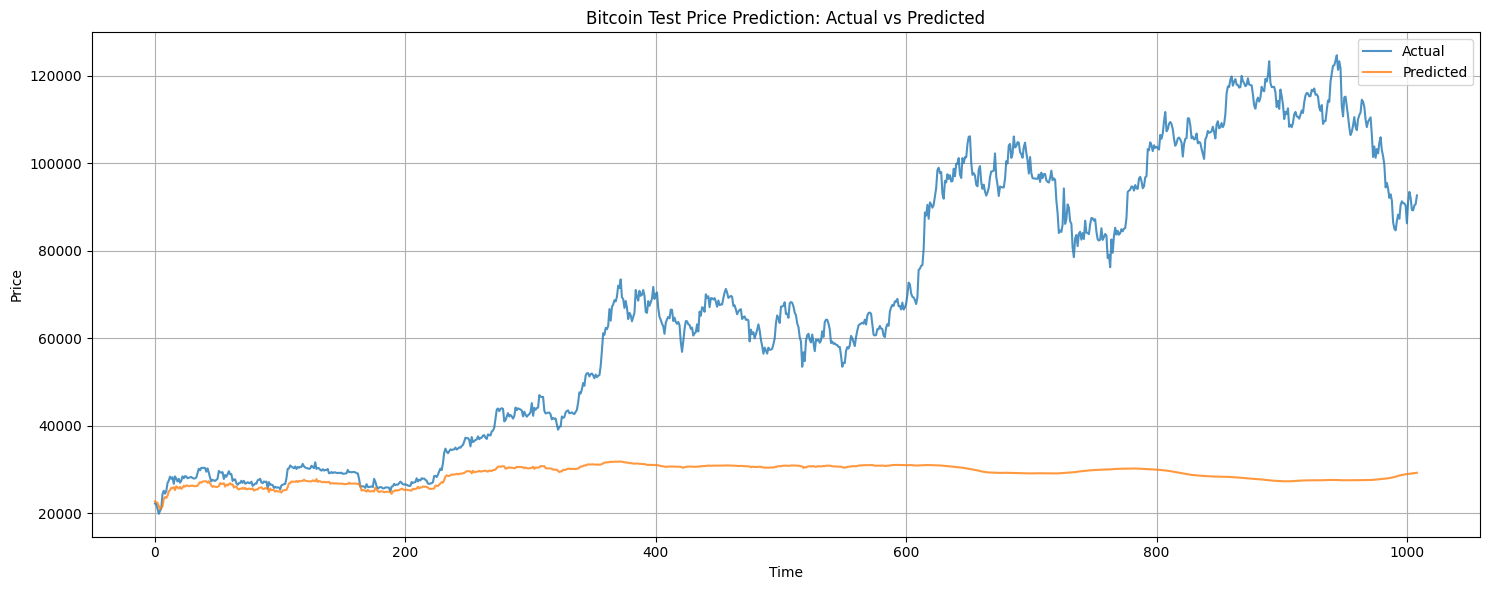

In [45]:
# Make predictions
y_pred = model_gru_2_layers.predict(X_test)

# Create figure
plt.figure(figsize=(15, 6))

# Plot actual vs predicted values
plt.plot(y_test, label='Actual', alpha=0.8)
plt.plot(y_pred, label='Predicted', alpha=0.8)

plt.title('Bitcoin Test Price Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Analysis of Model Performance: GRU vs LSTM

- The GRU model did not perform optimally for this time series data
- LSTM appears to be more suitable for this dataset due to its ability to better capture long-term dependencies in financial time series data
- This is likely because LSTM's additional memory gate helps retain important historical price patterns more effectively